## Quickstart PyDEEN Package
Data Engineer Enterprise Notebook for Python
Find more informationen at [PyPi.org](https://pypi.org/project/pydeen)

Solution for collecting and cleaning datasets for Data Science activities.

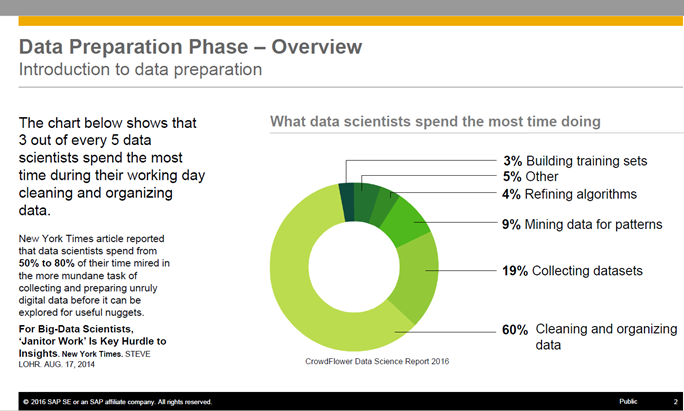

Source: [openSAP course 'Getting started with Data Sience'](https://open.sap.com/courses/ds1)

version: 16.09.2022

### Import required python packages

In [ ]:
# 1. import required libaries
from pydeen.auth import AuthBasic
from pydeen.sap_abap import SAPAbapHttpBackend, SAPAbapODataConnector

### Set YOUR SAP backend information

In [ ]:
# 2. enter your sap backend connection details
# Example - SAP CAL Demo
sap_host = "http://10.17.30.19:50000"
sap_client = "110" 
sap_name = "S4H110"

### Enter or load authentification information

With the following command the authentification information like username and password will be required. At the first run a menu will be opened. You can enter the information and save this information after input. 

If saved information is available at the next call the information will be loaded automatically. The information will be saved encrypted in the current path.

In [ ]:
# 3. load authentification or open menu for interaction
auth = AuthBasic()
auth.set_menu_context(sap_name)
if not auth.load_config(auth.get_menu_filename()):
    auth.menu()

### Connect to the SAP ABAP backend and load the PyDEEN OData connector

The variable backend contains the information for the SAP ABAP backend and can be reused by different connectors.
Within the SAPAbapODataConnector all required functions to access to SAP ABAP backend OData gateway are implemented. No additional preparation of the backend are required.

In [ ]:
# 4. open a SAP backend with OData connector
backend = SAPAbapHttpBackend(sap_name, sap_host, sap_client, auth=auth)
connector = SAPAbapODataConnector(backend)

### Open the interactive notebook mode

Some objects of the PyDEEN framework implements a ´menu()´ function. If this is called a command line interface menu will be opened. 

For the SAP OData Connector you can find functions like:
1. Search for available OData endpoints
2. Determine available entities for a selected endpoint
3. Display meta information with further functions 
4. Configure requests (e.g. max records, filter)
4. Extract data from the backend system
5. Display extracted data with further functions
6. Transform extracted data as pandas dataframe with further functions

These menus are context sensitive. Some functions are available only when other function runs before. After exit the interactive notebook mode you can access the extracted data via specific functions.

In [ ]:
# 5. open the sap OData connector menu for interaction: select endpoint + entity, select, get as pandas dataframe
connector.menu()

### Get the extracted data for further python processing

The next step shows hot to access the extracted data from the connector object. You can access a result object with raw data (e.g. in JSON format) or pandas dataframe object. 

With the pandas dataframe object the complete python data science universe can be used in further steps. For example df.head() or df.info() are available from the pandas package. 

In [ ]:
# 6. get the last selection as raw result
result = connector.get_current_result()
print(result)

# 7. get the last selection as pandas dataframe object
df = connector.get_current_result_as_pandas_df()
df.head()
df.info()

### Select more data and use this in further data science activities

In [ ]:
# 8. start step 5..7 again...